# Neural Network Train/Test Sampling Demo

## goals

The goals of this is to show that Neural Networks (even basic models) are very powerful function approximators. This however, has poor generalizability when taking the training samples outside of the given domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch import optim
from torch import nn
import torch
import math
import torch.nn.functional as F
from torch.autograd import Variable

In [2]:
#note: attempting to learn a simple function of R^2 -> R.

## Creating Model

In [3]:
class Model(nn.Module):
    def __init__(self, nonLinearFunc = 'tanh'):
        super().__init__()
        if nonLinearFunc == 'tanh':
            self.func = F.tanh
        elif nonLinearFunc == 'sigmoid':
            self.func = F.sigmoid
        else:
            self.func = F.relu
        self.Linear1 = torch.nn.Linear(2, 100)
        self.Linear2 = torch.nn.Linear(100, 100)
        self.Linear3 = torch.nn.Linear(100, 1)

    def forward(self, xb):
        out = self.Linear1(xb)
        out = self.func(out)
        out = self.Linear2(out)
        out = self.func(out)
        out = self.Linear3(out)
        return out

## Creating Data

In [4]:
def getData(domain, size = 20000):
    #note: domain is a list with 4 parts: [x1_min, x1_max, x2_min, x2_max]
    x1 = np.random.choice(np.arange(domain[0], domain[1], 0.001), size).reshape((size, 1))
    x2 = np.random.choice(np.arange(domain[2], domain[3], 0.001), size).reshape((size, 1))
    X = np.concatenate((x1,x2), axis = 1)
    return X

In [72]:
train_domain = [-4,4,-4,4]
trainSize = 1000

test_domain = [3,4,3,4]
testSize = 1000
Xtrain = getData(train_domain, trainSize)
Xtest = getData(test_domain, testSize)

In [73]:
def getY(X):
    #assume that the shape of X is (# samples, 2)
    return np.sum(X**2, axis = 1).reshape(X.shape[0], 1)

In [74]:
ytrain = getY(Xtrain)
ytest = getY(Xtest)

# Fitting Data

In [75]:
def fit(mdl, epochs,batch_size,X_train, y_train):
    inputs = Variable(torch.from_numpy(X_train)).float()
    labels = Variable(torch.from_numpy(y_train)).float()
    n = len(y_train)
    for epoch in range(epochs):
        i = 0
        totalLoss = 0
        while i < n - batch_size - 1:
            X = inputs[i:i + batch_size,:]
            Y = labels[i:i + batch_size, :]
            
            outputs = mdl(X)
            optimizer.zero_grad()
            loss = criterion(outputs, Y)
            # get gradients w.r.t to parameters
            loss.backward()

            # update parameters
            optimizer.step()
            totalLoss += loss.item()
            i += batch_size
        
        print('epoch {}, loss {}'.format(epoch, totalLoss/i))

In [76]:
model = Model(nonLinearFunc = 'sigmoid')

In [77]:
epochs = 1000
batchSize = 50
learningRate = 0.001

In [78]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [79]:
fit(model, epochs, batchSize, Xtrain, ytrain)

epoch 0, loss 2.0201505922016345
epoch 1, loss 1.0777665790758635
epoch 2, loss 0.9898088495354903
epoch 3, loss 0.9824380573473479
epoch 4, loss 0.9813550929019326
epoch 5, loss 0.980940768593236
epoch 6, loss 0.9806371829384252
epoch 7, loss 0.9803566139622738
epoch 8, loss 0.9800811767578125
epoch 9, loss 0.9798068458155582
epoch 10, loss 0.9795326694689299
epoch 11, loss 0.9792582622327303
epoch 12, loss 0.978983662253932
epoch 13, loss 0.9787087008827611
epoch 14, loss 0.9784331873843545
epoch 15, loss 0.9781571860062449
epoch 16, loss 0.9778804297196237
epoch 17, loss 0.9776029586791992
epoch 18, loss 0.9773247427689402
epoch 19, loss 0.9770454667743884
epoch 20, loss 0.9767652350977848
epoch 21, loss 0.9764838770816201
epoch 22, loss 0.9762014308728669
epoch 23, loss 0.9759176655819541
epoch 24, loss 0.9756325330232319
epoch 25, loss 0.9753460091038754
epoch 26, loss 0.9750579593056127
epoch 27, loss 0.9747683073344984
epoch 28, loss 0.9744769849275288
epoch 29, loss 0.974183819

epoch 241, loss 0.302548992759303
epoch 242, loss 0.29381090967278733
epoch 243, loss 0.2852130428113435
epoch 244, loss 0.27676339400442024
epoch 245, loss 0.2684695183603387
epoch 246, loss 0.26033829638832495
epoch 247, loss 0.2523760273582057
epoch 248, loss 0.24458840821918687
epoch 249, loss 0.23698047989293147
epoch 250, loss 0.22955663781417043
epoch 251, loss 0.22232055915029425
epoch 252, loss 0.2152753664317884
epoch 253, loss 0.20842347797594574
epoch 254, loss 0.20176667564793638
epoch 255, loss 0.19530611289174934
epoch 256, loss 0.18904234986556204
epoch 257, loss 0.18297535695527728
epoch 258, loss 0.17710454037314968
epoch 259, loss 0.17142877779508892
epoch 260, loss 0.16594645600569877
epoch 261, loss 0.1606555025201095
epoch 262, loss 0.15555337956077175
epoch 263, loss 0.15063718243649132
epoch 264, loss 0.14590361494767037
epoch 265, loss 0.14134908324793766
epoch 266, loss 0.1369696737590589
epoch 267, loss 0.13276125656931023
epoch 268, loss 0.1287194578271163
e

epoch 476, loss 0.010954241156578065
epoch 477, loss 0.010889273787799634
epoch 478, loss 0.01082495767819254
epoch 479, loss 0.010761281910695527
epoch 480, loss 0.010698238548479582
epoch 481, loss 0.010635817992059808
epoch 482, loss 0.010574012116381997
epoch 483, loss 0.010512813643405313
epoch 484, loss 0.010452211499214173
epoch 485, loss 0.010392198092059086
epoch 486, loss 0.010332766990912588
epoch 487, loss 0.010273909035481905
epoch 488, loss 0.010215612524434139
epoch 489, loss 0.010157874069715802
epoch 490, loss 0.010100684856113635
epoch 491, loss 0.010044040523077313
epoch 492, loss 0.009987926765492088
epoch 493, loss 0.009932341952072947
epoch 494, loss 0.00987728100073965
epoch 495, loss 0.009822729480893988
epoch 496, loss 0.009768680804654171
epoch 497, loss 0.009715137418947722
epoch 498, loss 0.009662083356004013
epoch 499, loss 0.009609519902028536
epoch 500, loss 0.009557432344085293
epoch 501, loss 0.009505819333227057
epoch 502, loss 0.009454669764167384
epo

epoch 704, loss 0.004115575434345948
epoch 705, loss 0.004102085201363815
epoch 706, loss 0.004088658251260456
epoch 707, loss 0.004075298630877545
epoch 708, loss 0.0040620041913107825
epoch 709, loss 0.004048777387330406
epoch 710, loss 0.004035615230861463
epoch 711, loss 0.004022519133592907
epoch 712, loss 0.00400948537023444
epoch 713, loss 0.003996516638680508
epoch 714, loss 0.003983613558505711
epoch 715, loss 0.003970771706417987
epoch 716, loss 0.003957991882374412
epoch 717, loss 0.003945276619572388
epoch 718, loss 0.003932621157483051
epoch 719, loss 0.003920029142969533
epoch 720, loss 0.003907495784132104
epoch 721, loss 0.0038950242023718983
epoch 722, loss 0.0038826131114834232
epoch 723, loss 0.0038702604017759623
epoch 724, loss 0.0038579699710795754
epoch 725, loss 0.0038457357099181727
epoch 726, loss 0.0038335610690869784
epoch 727, loss 0.003821444605526171
epoch 728, loss 0.0038093864917755128
epoch 729, loss 0.0037973845083462566
epoch 730, loss 0.003785440286

epoch 925, loss 0.002216702064401225
epoch 926, loss 0.00221136595465635
epoch 927, loss 0.002206048687037669
epoch 928, loss 0.0022007518967515544
epoch 929, loss 0.0021954734584218576
epoch 930, loss 0.0021902148504006234
epoch 931, loss 0.002184972390532494
epoch 932, loss 0.002179750815818184
epoch 933, loss 0.002174547612667084
epoch 934, loss 0.0021693614282106096
epoch 935, loss 0.0021641956975585537
epoch 936, loss 0.0021590470718710047
epoch 937, loss 0.0021539173314445896
epoch 938, loss 0.0021488068056733983
epoch 939, loss 0.002143713231933744
epoch 940, loss 0.002138637374890478
epoch 941, loss 0.0021335800345006744
epoch 942, loss 0.0021285396853559894
epoch 943, loss 0.002123519797858439
epoch 944, loss 0.0021185160585139927
epoch 945, loss 0.0021135285771206806
epoch 946, loss 0.0021085581928491593
epoch 947, loss 0.0021036080388646375
epoch 948, loss 0.002098672801726743
epoch 949, loss 0.0020937546577892807
epoch 950, loss 0.002088855395191594
epoch 951, loss 0.002083

In [80]:
model2 = Model(nonLinearFunc = 'tanh')
optimizer = torch.optim.SGD(model2.parameters(), lr=learningRate)

In [81]:
fit(model2, epochs, batchSize, Xtrain, ytrain)

epoch 0, loss 2.996111297607422
epoch 1, loss 2.4012020954332853
epoch 2, loss 1.7403826101202713
epoch 3, loss 1.3572473224840667
epoch 4, loss 1.2171406876413446
epoch 5, loss 1.1496995945980675
epoch 6, loss 1.100595887836657
epoch 7, loss 1.0571648768374795
epoch 8, loss 1.0145154973080284
epoch 9, loss 0.9697656972784745
epoch 10, loss 0.9207686956305253
epoch 11, loss 0.8658458448711195
epoch 12, loss 0.803895841899671
epoch 13, loss 0.734524070338199
epoch 14, loss 0.6582141856143349
epoch 15, loss 0.5766622382716129
epoch 16, loss 0.49305577127557054
epoch 17, loss 0.4118352568776984
epoch 18, loss 0.3377135678341514
epoch 19, loss 0.274365113408942
epoch 20, loss 0.22350593617087916
epoch 21, loss 0.18476790277581465
epoch 22, loss 0.1562822605434217
epoch 23, loss 0.1355640102687635
epoch 24, loss 0.12025675196396678
epoch 25, loss 0.10852160202829461
epoch 26, loss 0.09910412311553955
epoch 27, loss 0.09122619779486406
epoch 28, loss 0.08443243942762677
epoch 29, loss 0.0784

epoch 226, loss 0.0012818254452002676
epoch 227, loss 0.0012742314095559872
epoch 228, loss 0.0012667570890564667
epoch 229, loss 0.0012593987976249896
epoch 230, loss 0.0012521559823500483
epoch 231, loss 0.0012450240081862398
epoch 232, loss 0.001237999055730669
epoch 233, loss 0.0012310839150297015
epoch 234, loss 0.0012242716903749266
epoch 235, loss 0.0012175608328298519
epoch 236, loss 0.0012109502012792386
epoch 237, loss 0.0012044371840985197
epoch 238, loss 0.0011980197049285236
epoch 239, loss 0.0011916949521554143
epoch 240, loss 0.0011854621062153264
epoch 241, loss 0.001179319802475603
epoch 242, loss 0.0011732638176334533
epoch 243, loss 0.0011672928478372725
epoch 244, loss 0.0011614055872747773
epoch 245, loss 0.0011556003674080496
epoch 246, loss 0.0011498767392415748
epoch 247, loss 0.001144230652012323
epoch 248, loss 0.0011386624351143837
epoch 249, loss 0.0011331685103083912
epoch 250, loss 0.001127749244241338
epoch 251, loss 0.001122401666484381
epoch 252, loss 0

epoch 446, loss 0.0006468602662023745
epoch 447, loss 0.0006456081745655914
epoch 448, loss 0.000644359421965323
epoch 449, loss 0.0006431172768536367
epoch 450, loss 0.0006418787040992787
epoch 451, loss 0.000640645391846958
epoch 452, loss 0.0006394185615997565
epoch 453, loss 0.0006381946351183088
epoch 454, loss 0.0006369763593140401
epoch 455, loss 0.0006357630224604355
epoch 456, loss 0.0006345543186915549
epoch 457, loss 0.0006333503793728979
epoch 458, loss 0.0006321515044883678
epoch 459, loss 0.0006309574705205466
epoch 460, loss 0.0006297670500843149
epoch 461, loss 0.000628582013672904
epoch 462, loss 0.0006274009182264931
epoch 463, loss 0.000626224346066776
epoch 464, loss 0.0006250530873474322
epoch 465, loss 0.0006238852049175062
epoch 466, loss 0.0006227220222353936
epoch 467, loss 0.0006215631452045942
epoch 468, loss 0.0006204090247813024
epoch 469, loss 0.0006192588453230105
epoch 470, loss 0.0006181125852622484
epoch 471, loss 0.0006169707602576205
epoch 472, loss 

epoch 665, loss 0.00045053892425800623
epoch 666, loss 0.0004498813938545553
epoch 667, loss 0.0004492251712240671
epoch 668, loss 0.0004485713112118997
epoch 669, loss 0.000447916825743098
epoch 670, loss 0.0004472654352062627
epoch 671, loss 0.0004466156377211997
epoch 672, loss 0.0004459668235167077
epoch 673, loss 0.000445319565111085
epoch 674, loss 0.0004446734948769996
epoch 675, loss 0.0004440297176571269
epoch 676, loss 0.0004433865198179295
epoch 677, loss 0.0004427445621082657
epoch 678, loss 0.0004421042690151616
epoch 679, loss 0.0004414659424831993
epoch 680, loss 0.00044082812376712495
epoch 681, loss 0.00044019182065599844
epoch 682, loss 0.00043955763703898377
epoch 683, loss 0.0004389254513539766
epoch 684, loss 0.00043829354408540225
epoch 685, loss 0.00043766319849773455
epoch 686, loss 0.00043703424009053333
epoch 687, loss 0.00043640682179676857
epoch 688, loss 0.00043578046226972026
epoch 689, loss 0.00043515657417868313
epoch 690, loss 0.0004345330566559967
epoc

epoch 885, loss 0.00033432694544133386
epoch 886, loss 0.00033390286231511516
epoch 887, loss 0.00033347905662498977
epoch 888, loss 0.0003330563371510882
epoch 889, loss 0.00033263487447249263
epoch 890, loss 0.0003322136980530463
epoch 891, loss 0.0003317934617792305
epoch 892, loss 0.0003313739401729483
epoch 893, loss 0.0003309549959866624
epoch 894, loss 0.00033053685469846975
epoch 895, loss 0.00033011971433695995
epoch 896, loss 0.00032970324060634565
epoch 897, loss 0.00032928745605443656
epoch 898, loss 0.00032887201364103114
epoch 899, loss 0.00032845722903546533
epoch 900, loss 0.000328043927683642
epoch 901, loss 0.00032763094592251277
epoch 902, loss 0.0003272186847109544
epoch 903, loss 0.00032680715287202285
epoch 904, loss 0.00032639632295621067
epoch 905, loss 0.00032598680669539853
epoch 906, loss 0.00032557719436131027
epoch 907, loss 0.0003251688515669421
epoch 908, loss 0.0003247606048458501
epoch 909, loss 0.00032435330317208644
epoch 910, loss 0.00032394756906126

In [82]:
model3 = Model(nonLinearFunc = 'relu')
optimizer = torch.optim.SGD(model3.parameters(), lr=learningRate)

In [83]:
fit(model3, epochs, batchSize, Xtrain, ytrain)

epoch 0, loss 1.7627814764725533
epoch 1, loss 0.2740227779589201
epoch 2, loss 0.2285530115428724
epoch 3, loss 0.2056936509985673
epoch 4, loss 0.18537397083483245
epoch 5, loss 0.16678453495627957
epoch 6, loss 0.14975146544607063
epoch 7, loss 0.13405819340756064
epoch 8, loss 0.11960618044200697
epoch 9, loss 0.10638661008132132
epoch 10, loss 0.09439540637166877
epoch 11, loss 0.08362526843422338
epoch 12, loss 0.0740362024307251
epoch 13, loss 0.06556326188539204
epoch 14, loss 0.05812708390386481
epoch 15, loss 0.05165318802783364
epoch 16, loss 0.0460483329547079
epoch 17, loss 0.04121152720953289
epoch 18, loss 0.03706361231050993
epoch 19, loss 0.03350895511476617
epoch 20, loss 0.03046943413583856
epoch 21, loss 0.02787603070861415
epoch 22, loss 0.02566162187802164
epoch 23, loss 0.023770313827615037
epoch 24, loss 0.022152827037008185
epoch 25, loss 0.02075961599224492
epoch 26, loss 0.01955480584972783
epoch 27, loss 0.018502717237723502
epoch 28, loss 0.0175772545525902

epoch 225, loss 0.0005733333802536915
epoch 226, loss 0.0005692757048497074
epoch 227, loss 0.0005652538216427752
epoch 228, loss 0.0005612892265382566
epoch 229, loss 0.000557337765042719
epoch 230, loss 0.0005534679501464492
epoch 231, loss 0.0005496597103774548
epoch 232, loss 0.0005458834816358592
epoch 233, loss 0.0005421811695161618
epoch 234, loss 0.0005384821611407556
epoch 235, loss 0.0005348146304880318
epoch 236, loss 0.0005311736533124196
epoch 237, loss 0.0005275607167890197
epoch 238, loss 0.0005240048330865408
epoch 239, loss 0.0005205188230856469
epoch 240, loss 0.0005170447614632154
epoch 241, loss 0.00051365900588663
epoch 242, loss 0.0005103018791659882
epoch 243, loss 0.0005069418271121226
epoch 244, loss 0.00050363236450051
epoch 245, loss 0.0005003568696740426
epoch 246, loss 0.0004971219373768881
epoch 247, loss 0.0004939629412011096
epoch 248, loss 0.0004908285593908084
epoch 249, loss 0.0004877899489120433
epoch 250, loss 0.00048475016496683424
epoch 251, loss 

epoch 445, loss 0.00020416608080267907
epoch 446, loss 0.00020350734213073004
epoch 447, loss 0.00020283349838696028
epoch 448, loss 0.00020214897555936325
epoch 449, loss 0.0002014817143055169
epoch 450, loss 0.0002008257847965548
epoch 451, loss 0.00020017935232700485
epoch 452, loss 0.00019952819315030386
epoch 453, loss 0.00019888093547993586
epoch 454, loss 0.00019822016873053815
epoch 455, loss 0.00019757765051173538
epoch 456, loss 0.00019693974209459205
epoch 457, loss 0.00019630408208621175
epoch 458, loss 0.0001956783269384974
epoch 459, loss 0.00019505512165395836
epoch 460, loss 0.00019444008186263474
epoch 461, loss 0.00019381664056134851
epoch 462, loss 0.0001932081156165192
epoch 463, loss 0.00019259293073494184
epoch 464, loss 0.00019198578414752294
epoch 465, loss 0.0001913854786145844
epoch 466, loss 0.00019077944789866084
epoch 467, loss 0.00019018178021437243
epoch 468, loss 0.00018958498576754018
epoch 469, loss 0.00018898191518689457
epoch 470, loss 0.000188378910

epoch 660, loss 0.00012052533645673018
epoch 661, loss 0.00012033206435214532
epoch 662, loss 0.0001201366010661188
epoch 663, loss 0.00011994002889351625
epoch 664, loss 0.00011974690494274623
epoch 665, loss 0.00011955267970303172
epoch 666, loss 0.00011935884647659565
epoch 667, loss 0.00011916472319219458
epoch 668, loss 0.00011897524328608262
epoch 669, loss 0.00011877287583621709
epoch 670, loss 0.00011857806153497414
epoch 671, loss 0.00011838276110785571
epoch 672, loss 0.00011818807878482499
epoch 673, loss 0.00011799876308558802
epoch 674, loss 0.00011780290668340106
epoch 675, loss 0.00011760943373175044
epoch 676, loss 0.00011741897593693514
epoch 677, loss 0.00011722501379584796
epoch 678, loss 0.00011703016947170621
epoch 679, loss 0.00011684471520742304
epoch 680, loss 0.00011665114422181719
epoch 681, loss 0.00011646582536693466
epoch 682, loss 0.0001162744639441371
epoch 683, loss 0.00011609163196561368
epoch 684, loss 0.00011590740324831323
epoch 685, loss 0.000115717

epoch 880, loss 8.957683280306427e-05
epoch 881, loss 8.94846365247902e-05
epoch 882, loss 8.93833260296991e-05
epoch 883, loss 8.927780399589162e-05
epoch 884, loss 8.917217939405849e-05
epoch 885, loss 8.90737176431637e-05
epoch 886, loss 8.897112890783894e-05
epoch 887, loss 8.88701668009162e-05
epoch 888, loss 8.876354445850378e-05
epoch 889, loss 8.866353965315379e-05
epoch 890, loss 8.856418910191247e-05
epoch 891, loss 8.8455686223154e-05
epoch 892, loss 8.83544985155918e-05
epoch 893, loss 8.82588681078663e-05
epoch 894, loss 8.815672947093845e-05
epoch 895, loss 8.805655469921859e-05
epoch 896, loss 8.79472980618869e-05
epoch 897, loss 8.785596288936703e-05
epoch 898, loss 8.77590351247866e-05
epoch 899, loss 8.766070265617025e-05
epoch 900, loss 8.756463881582022e-05
epoch 901, loss 8.746486451280744e-05
epoch 902, loss 8.736629958117479e-05
epoch 903, loss 8.726782422806872e-05
epoch 904, loss 8.717112108378819e-05
epoch 905, loss 8.706802073375959e-05
epoch 906, loss 8.6974

## Testing Model

In [84]:
def makePredictions(X, mdl):
    inputs = Variable(torch.from_numpy(X)).float()
    outputs = mdl(inputs)
    return outputs.detach().numpy()

In [85]:
Xs = np.arange(-4, 4, 0.0001)
Xs = Xs.reshape((Xs.shape[0], 1))

In [86]:
domain = np.concatenate((Xs, Xs), axis = 1)

In [87]:
pred = makePredictions(domain, model)
pred1 = makePredictions(domain, model2)
pred2 = makePredictions(domain, model3)

In [88]:
truth = getY(domain)

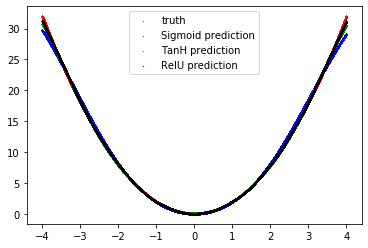

In [89]:
fig = plt.figure()
plt.scatter(domain[:,0], truth, marker='o', c = 'red', label = 'truth', s = 0.1)
plt.scatter(domain[:,0], pred, marker='o', c = 'blue', label = 'Sigmoid prediction', s = 0.1)
plt.scatter(domain[:,0], pred1, marker='o', c = 'green', label = 'TanH prediction', s = 0.1)
plt.scatter(domain[:,0], pred2, marker='o', c = 'black', label = 'RelU prediction', s = 0.1)
plt.legend()
#ax.scatter(domain[:,0], domain[:,1], pred, marker='o', c = 'blue')
#ax.scatter(domain[:,0], domain[:,1], truth, marker='o', c = 'red')
fig.savefig('mainPlot3.png', dpi = 320)

Observation:

The main obsevation is that the model performs well within the range of the given data. But when going outside that range, the model makes horrible predictions. 

This indicates that neural networks will perform expotentially well at fitting the given data (which harkens back to the idea of an artificial neural network being a great function approximator). However, they will likely do horribly when it comes to data outside the given domain.

This gives insight to the idea of transfer learning. If a neural network only works well at fitting a given domain, to what confidence can be transfer domains and remain confident in the performance of our model? To answer this, we would have to find how "similar" two domains are. The current gap within that exercise is that there is no mathematical definition of the similarity of two domains. Maybe, a "domain" object can be defined in a mathematical framework such that a similarity measurement becomes quantifiable.

An interesting observation is that RelU performs the best at generalizability. RelU is also known for having good properties for learning within many-layer networks. This suggests another reason to use RelU over other non-linear functions within ANN.